<a href="https://colab.research.google.com/github/ayuu16/Learning_ML/blob/main/House_price_predictor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd

melbourne_file_path = './melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path)
melbourne_data.columns


Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [3]:
print(melbourne_data.shape)

(13580, 21)


In [4]:
melbourne_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
melbourne_data.isnull().sum()

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,0
Method,0
SellerG,0
Date,0
Distance,0
Postcode,0


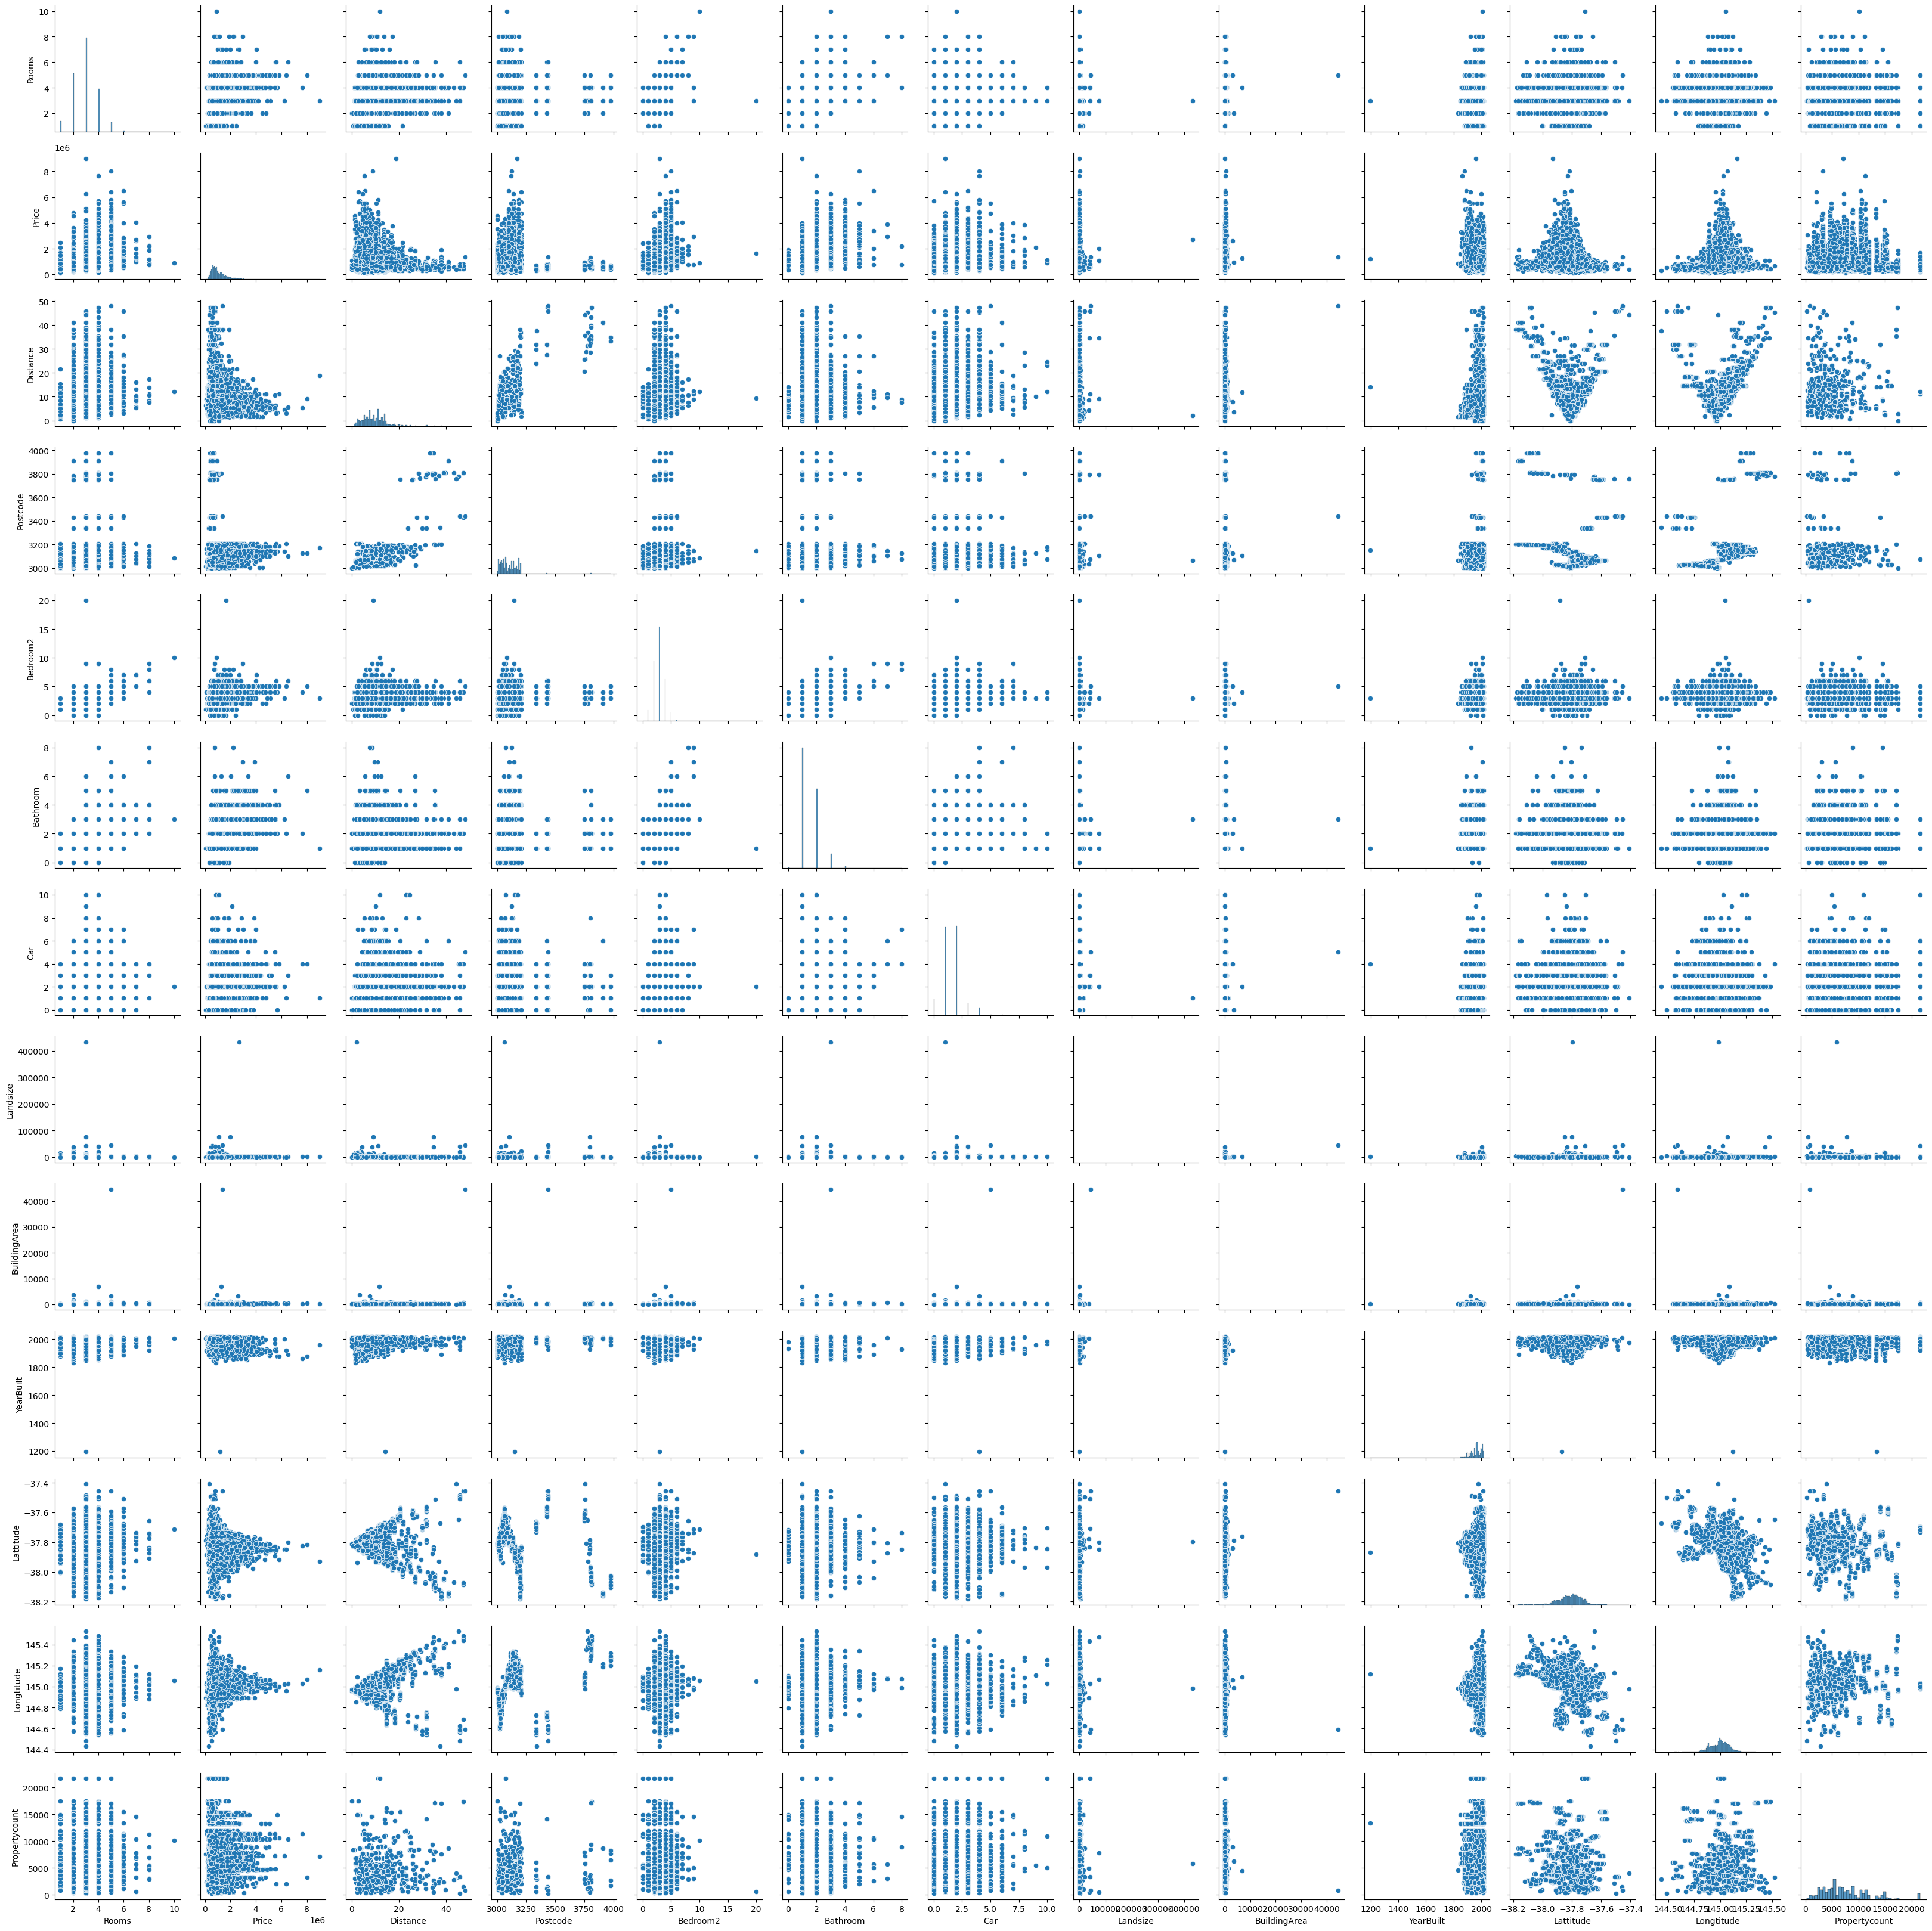

In [7]:
sns.pairplot(melbourne_data, height = 2.5)
plt.tight_layout()

<ipython-input-20-b64e75f01824>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_data['Price']);


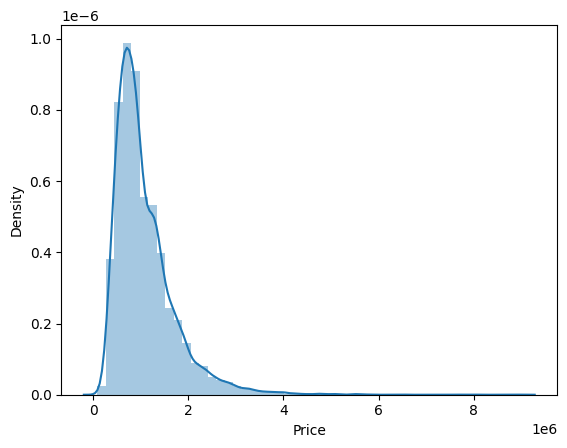

In [20]:
sns.distplot(melbourne_data['Price']);

In [21]:
print("Skewness : %f" % melbourne_data['Price'].skew())
print("Kurtosis : %f" % melbourne_data['Price'].kurt())

Skewness : 2.239624
Kurtosis : 9.874339


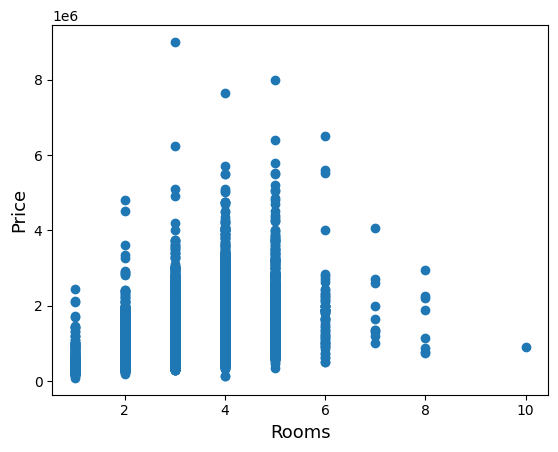

In [22]:
fig, ax = plt.subplots()
ax.scatter(x = melbourne_data['Rooms'], y = melbourne_data['Price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Rooms', fontsize=13)
plt.show()

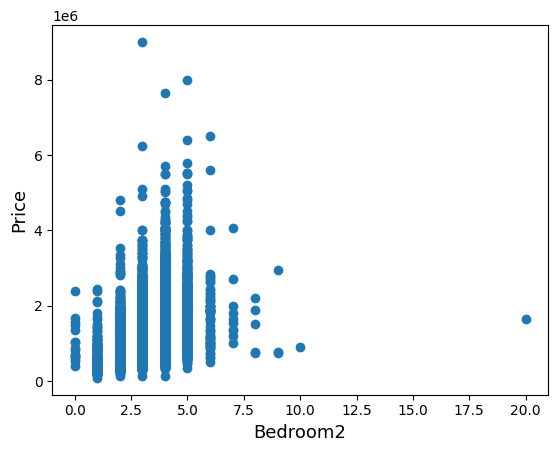

In [25]:
fig, ax = plt.subplots()
ax.scatter(x = melbourne_data['Bedroom2'], y = melbourne_data['Price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Bedroom2', fontsize=13)
plt.show()

<ipython-input-26-f2b7763011b3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_data['Price'], fit=norm);



 mu = 1075684.08 and sigma = 639287.19



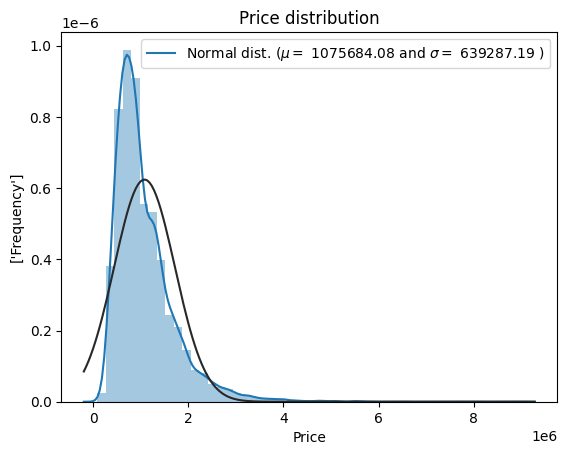

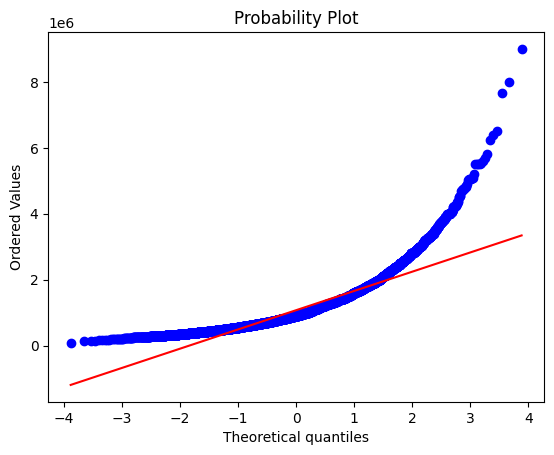

In [26]:
from scipy import stats
from scipy.stats import norm, skew

sns.distplot(melbourne_data['Price'], fit=norm);

(mu, sigma) = norm.fit(melbourne_data['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel(['Frequency'])
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(melbourne_data['Price'], plot=plt)
plt.show()

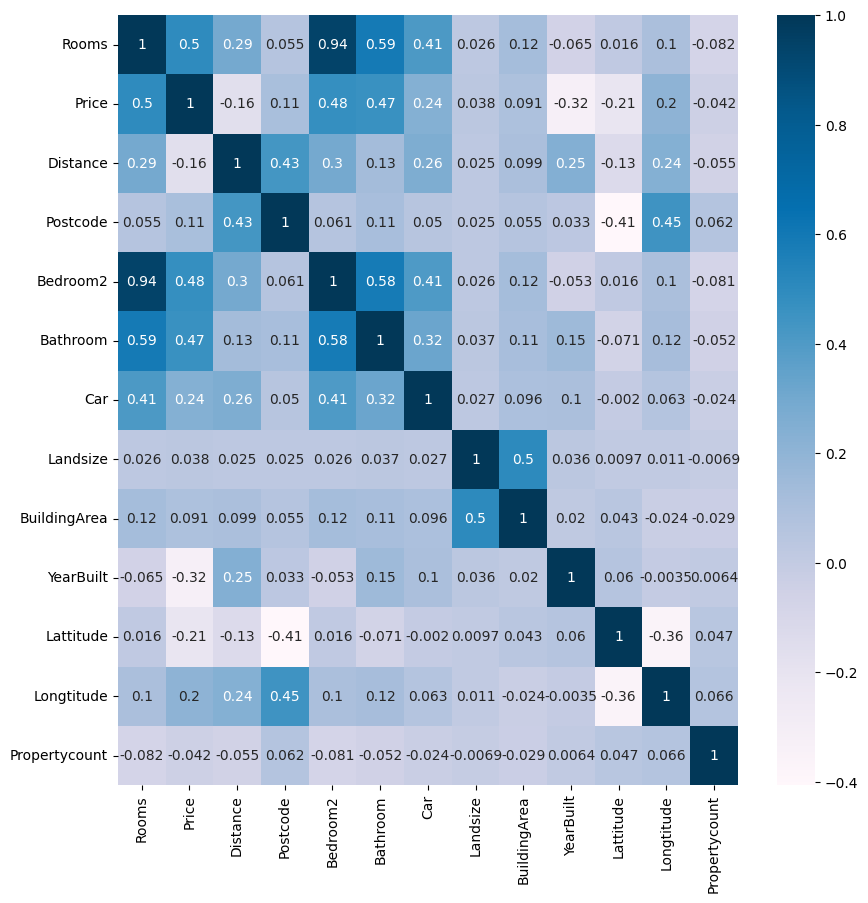

In [13]:
numeric_data = melbourne_data.select_dtypes(include = ['number'])
plt.figure(figsize=(10,10))
cor = numeric_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [27]:
cor_target = abs(cor['Price'])
relevant_features = cor_target[cor_target>0.2]
names = [index for index, value in relevant_features.items()]
names.remove('Price')

print(names)
print(len(names))

['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Lattitude', 'Longtitude']
7


In [73]:
from sklearn.model_selection import train_test_split

X = melbourne_data.drop(["Propertycount","Lattitude","YearBuilt","Distance"], axis = 1)
y = melbourne_data["Price"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(10864, 17)
(2716, 17)
(13580,)
(2716,)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Select numerical features and handle missing values
X_train1 = X_train.select_dtypes(include=['number'])
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of each column
X_train1_imputed = imputer.fit_transform(X_train1)

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train1_imputed, y_train)  # Use y_train instead of y for training

LinearRegression()

In [76]:
X_test1 = X_test.select_dtypes(include=['number'])
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of each column
X_test1_imputed = imputer.fit_transform(X_test1)

In [82]:
predictions = lr.predict(X_test1_imputed)

y_test

,Price
1061,2600000.0
6482,620000.0
8395,1000000.0
4659,430000.0
7386,392250.0
...,...
10455,1415000.0
3616,6500000.0
577,2450000.0
12620,1155000.0


In [83]:
predictions

array([2600000.,  620000., 1000000., ..., 2450000., 1155000., 1040000.])

In [81]:
=from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(rmse)


1.7760593661924478e-10
